# Task - 2 Stock Market Prediction and Forecasting using Stacked LSTM

# Author: Manisha Thokale,

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Import the data and remove rows containing NAN values
data = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

In [4]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
data.shape

(2035, 8)

In [6]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [9]:
data_close = data["Close"]
data_close.shape

(2035,)

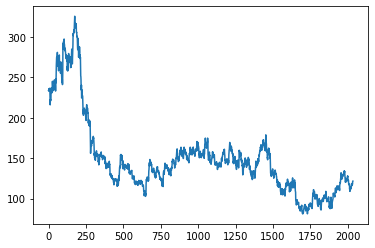

In [11]:
#plotting the close time into graph
plt.plot(data_close)

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
data_close = scaler.fit_transform(np.array(data_close).reshape(-1,1))

In [13]:
data_close.shape

(2035, 1)

In [14]:
data_close

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [15]:
#Split the data into train and test split
training_size = int(len(data_close) * 0.80)
test_size = len(data_close) - training_size
train_data, test_data = data_close[0:training_size,:], data_close[training_size:len(data_close),:1]

In [16]:
print(train_data.shape, test_data.shape)

(1628, 1) (407, 1)


In [17]:
#creating new dataset by seperating x_data and y_data
def new_dataset(dataset, time_step = 1):
    X_Data, Y_Data = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        X_Data.append(a)
        Y_Data.append(dataset[i+time_step, 0])
    return np.array(X_Data), np.array(Y_Data)

In [18]:
time_step = 200
x_train, y_train = new_dataset(train_data, time_step)
x_test, y_test = new_dataset(test_data, time_step)

In [19]:
#Reshape the input to be [samples, time steps, features] which is the requirement of LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [20]:
#Creating the Model
model = Sequential()
model.add(LSTM(50, activation="relu", return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50,  activation="relu", return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [21]:
#showing model's summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 39s 1s/step - loss: 0.0258 - val_loss: 0.0052
Epoch 2/100
23/23 [==============================] - 24s 1s/step - loss: 0.0039 - val_loss: 0.0048
Epoch 3/100
23/23 [==============================] - 23s 999ms/step - loss: 0.0018 - val_loss: 0.0047
Epoch 4/100
23/23 [==============================] - 23s 1s/step - loss: 0.0015 - val_loss: 0.0029
Epoch 5/100
23/23 [==============================] - 23s 1s/step - loss: 0.0013 - val_loss: 0.0021
Epoch 6/100
23/23 [==============================] - 24s 1s/step - loss: 0.0011 - val_loss: 0.0017
Epoch 7/100
23/23 [==============================] - 23s 997ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 8/100
23/23 [==============================] - 23s 1s/step - loss: 0.0010 - val_loss: 0.0010
Epoch 9/100
23/23 [==============================] - 23s 1s/step - loss: 9.8876e-04 - val_loss: 9.0152e-04
Epoch 10/100
23/23 [==============================] - 23s 991ms/step - loss: 9.6699e-04 - val_l

In [23]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [24]:
#Transforming back
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [25]:
#Calculate RMSE
from sklearn.metrics import mean_squared_error
import math
math.sqrt(mean_squared_error(y_train, train_predict))

145.53383240754988

In [26]:
#test data
math.sqrt(mean_squared_error(y_test, test_predict))

110.31376160774202

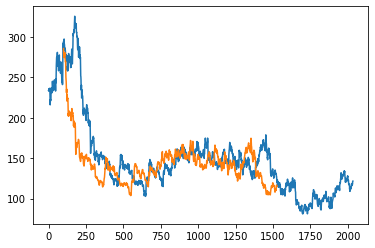

In [27]:
#plotting
look_back = 100
trainPredictPlot = np.empty_like(data_close)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(data_close)
testPredictPlot[:,:] = np.nan

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(data_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Predicting for next 30 days

In [28]:
len(test_data), x_test.shape

(407, (206, 200, 1))

In [29]:
x_input = test_data[207:].reshape(1,-1)
x_input.shape

(1, 200)

In [30]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [31]:
lst_output=[]
n_steps=199
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)


0 day input [0.0629085  0.0692402  0.0755719  0.07781863 0.08088235 0.08843954
 0.09395425 0.09599673 0.08660131 0.09027778 0.08517157 0.08374183
 0.07945261 0.09109477 0.09129902 0.08803105 0.09681373 0.11417484
 0.10498366 0.09987745 0.08537582 0.08047386 0.06862745 0.06576797
 0.06147876 0.07169118 0.07026144 0.0747549  0.06821895 0.0692402
 0.07066993 0.06801471 0.06678922 0.07414216 0.07169118 0.08639706
 0.08312908 0.06311275 0.0629085  0.05167484 0.03186275 0.04003268
 0.03860294 0.04105392 0.03390523 0.03125    0.02634804 0.05861928
 0.06311275 0.0620915  0.05535131 0.08455882 0.05514706 0.06045752
 0.0557598  0.0439134  0.02920752 0.02818627 0.04718137 0.06045752
 0.05861928 0.06168301 0.06699346 0.07087418 0.0755719  0.07700163
 0.10375817 0.10314542 0.10334967 0.10089869 0.10437092 0.09803922
 0.09722222 0.09783497 0.09579248 0.09109477 0.09313725 0.08558007
 0.09517974 0.11172386 0.12275327 0.12806373 0.1313317  0.12479575
 0.11090686 0.10743464 0.11621732 0.11683007 0.1176